In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline


In [9]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=100,n_features= 2,n_classes= 2,n_informative=1,n_redundant=0,n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)


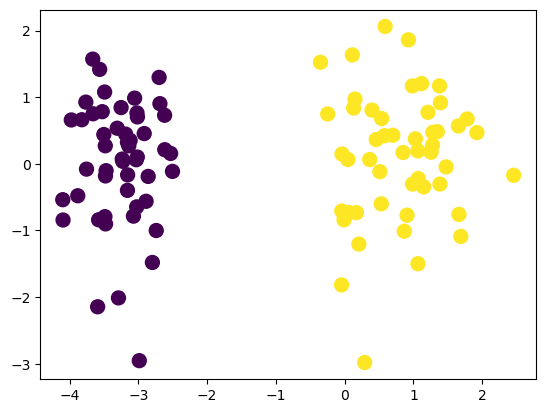

In [35]:
# here c is for color the both classes s for size of dotss 
plt.scatter(x[:,0],x[:,1],c = y,s=100)
plt.show()

In [19]:
#  now we call logestic regression as train our model 
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(x,y)

LogisticRegression()

In [21]:
# print coef_ and intercept are 
print("coeficent means w1,w2",logr.coef_)
print("intercept_ means w0 ",logr.intercept_)

coeficent means w1,w2 [[2.36679363 0.02300492]]
intercept_ means w0  [3.13571596]


In [43]:
#  y = M*X + C 
# M = -(coef_ 1/ coeef_2)
# C = -(intercept/coef_2)
m = -(logr.coef_[0][0]/logr.coef_[0][1])
print("slope is ",m)
c = -(logr.intercept_/logr.coef_[0][1])
print("c is ",c)

slope is  -102.88205179540327
c is  [-136.30630349]


In [44]:
#  now generate the points for line 
x_points = np.linspace(2,-2,100)
print(x_points)
y_points = m*x_points+c
print(y_points)

[ 2.          1.95959596  1.91919192  1.87878788  1.83838384  1.7979798
  1.75757576  1.71717172  1.67676768  1.63636364  1.5959596   1.55555556
  1.51515152  1.47474747  1.43434343  1.39393939  1.35353535  1.31313131
  1.27272727  1.23232323  1.19191919  1.15151515  1.11111111  1.07070707
  1.03030303  0.98989899  0.94949495  0.90909091  0.86868687  0.82828283
  0.78787879  0.74747475  0.70707071  0.66666667  0.62626263  0.58585859
  0.54545455  0.50505051  0.46464646  0.42424242  0.38383838  0.34343434
  0.3030303   0.26262626  0.22222222  0.18181818  0.14141414  0.1010101
  0.06060606  0.02020202 -0.02020202 -0.06060606 -0.1010101  -0.14141414
 -0.18181818 -0.22222222 -0.26262626 -0.3030303  -0.34343434 -0.38383838
 -0.42424242 -0.46464646 -0.50505051 -0.54545455 -0.58585859 -0.62626263
 -0.66666667 -0.70707071 -0.74747475 -0.78787879 -0.82828283 -0.86868687
 -0.90909091 -0.94949495 -0.98989899 -1.03030303 -1.07070707 -1.11111111
 -1.15151515 -1.19191919 -1.23232323 -1.27272727 -1.3

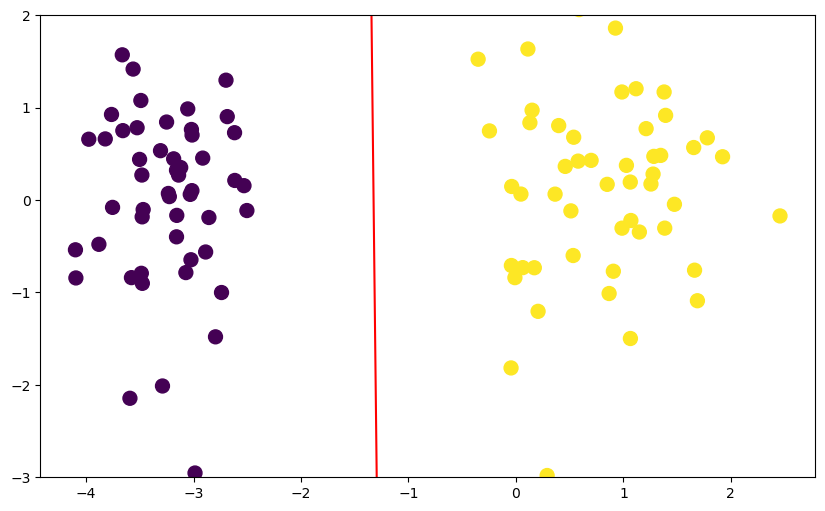

In [47]:
# now lets draw a logistic regrssion line 
plt.figure(figsize=(10,6))

plt.plot(x_points,y_points,color = "red")
plt.scatter(x[:,0],x[:,1],c = y,s=100)
plt.ylim(-3,2)
plt.show()

## code for logistic regression function with gradient descent

In [69]:
def lgrf(X,y):
   
    # So this adds a new column of 1s as the first column of your dataset.
    X = np.insert(X,0,1,axis=1)
    
    # initilize weights 
    #number of columns (here 3 )
    weights = np.ones(X.shape[1])

    # learning rate
    lr = 0.5

    # now loop for number of epoches 
    for i in range (5000):
        y_hat = sigmoid(np.dot(X,weights))

        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
    return weights[1:],weights[0]

    

    
    
    


In [70]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [71]:
# function calling 
coef_,intercept_ = lgrf(x,y)

In [72]:
coef_

array([4.83926872, 0.21182255])

In [73]:
intercept_

np.float64(5.833388649053249)

In [74]:
# scatter plot for our logistic regression function 
# firste we have to create a line
lm = -(coef_[0]/coef_[1])
lc = -(intercept_/coef_[1])
l_x_inputs = np.linspace(2,-2,100)
l_y_inputs = lm*l_x_inputs+lc

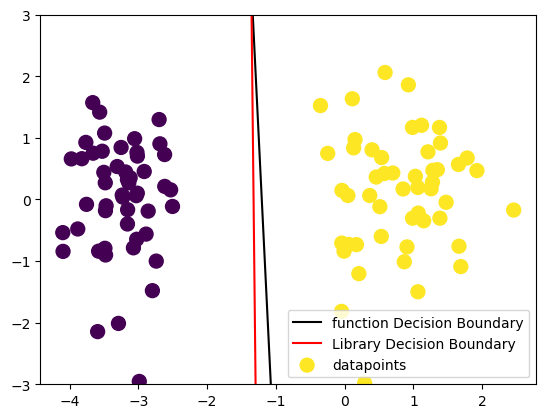

In [77]:
# plot 
plt.plot(l_x_inputs,l_y_inputs,color = "black", label="function Decision Boundary")
plt.plot(x_points,y_points,color = "red", label="Library Decision Boundary")
plt.scatter(x[:,0],x[:,1],c = y,s=100,label = "datapoints")
plt.ylim(-3,3)
plt.legend()
plt.show()